# plot_stream

This script takes a stream from user input and plots it. It also can plot a section of the script.

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_stream(stream, start=None, end=None):
    """
    start and end are plot slice positions, provided in minutes, passed from stream start and slice start.
    Or start/end can be set as datetime strings.
    """
    from obspy import UTCDateTime
    
    if not start:
        start = stream[0].stats.starttime
    elif type(start) in [float, int]:
        start = stream[0].stats.starttime + start*60.
    else:
        start = UTCDateTime(start)
    if not end:
        end = stream[-1].stats.endtime
    elif type(end) in [float, int]:
        end = start + end*60.
    else:
        end = UTCDateTime(end)
        
    stream = stream.slice(start, end)
    stream.plot()

## Some local steam paths:

`C:/dev/seismo-transformer/test/archives/NYSH.IM.00.EHZ.2021.091`

In [3]:
stream_path = input()

In [4]:
stream_path = 'C:/data/seismic_streams/SABO.IM.00.SHZ.2014.286'

In [5]:
from obspy import read
stream = read(stream_path)
stream[0].stats.starttime, stream[-1].stats.endtime

(2016-11-09T00:00:00.400000Z, 2016-11-09T23:26:17.240000Z)

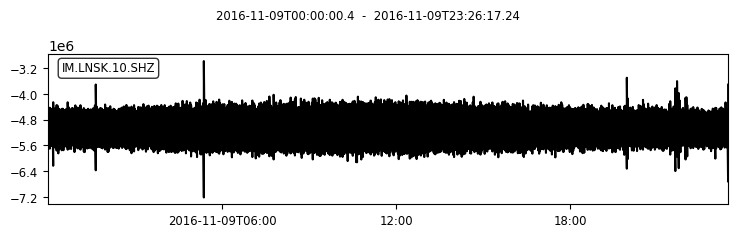

In [6]:
plot_stream(stream)

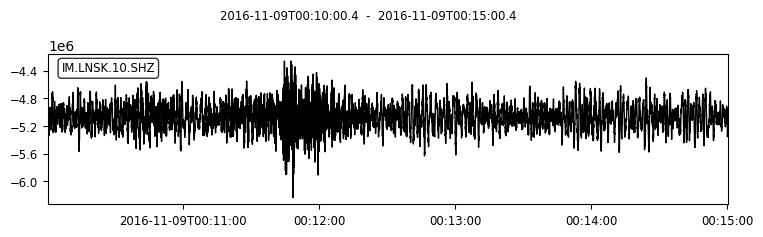

In [7]:
plot_stream(stream, 10, 5)

## Interactive filtering

In [8]:
from ipywidgets import interact
import ipywidgets as widgets

In [149]:
def plot_filtered(stream, start=None, end=None):
    
    from obspy import UTCDateTime
    
    if not start:
        start = stream[0].stats.starttime
    elif type(start) in [float, int]:
        start = stream[0].stats.starttime + start*60.
    else:
        start = UTCDateTime(start)
    if not end:
        end = stream[-1].stats.endtime
    elif type(end) in [float, int]:
        end = start + end*60.
    else:
        end = UTCDateTime(end)
        
    stream = stream.slice(start, end)
    
    def plt_f(freq, do_filter, mult):
        freq = freq * mult
        st = stream.copy()
        plt.clf()
        fig = plt.figure(figsize = (8, 4), dpi = 90)
        if do_filter:
            st.filter('highpass', freq=freq)
            fig.suptitle(f'highpass = {freq}')
        else:
            fig.suptitle('no filter')
        st.plot(fig=fig)
        
    yes_no = {'true': True, 'false': False}
    multipliers = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.]
    interact(plt_f, freq=(1, 10), do_filter=yes_no, mult=multipliers)

In [157]:
plot_filtered(stream, 11, 2)

interactive(children=(IntSlider(value=5, description='freq', max=10, min=1), Dropdown(description='do_filter',…